In [1]:
import pandas as pd 

In [4]:
df = pd.read_csv('fs_task1_10f.csv')

In [5]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,2015,163.000000,-1.450726,0.5,332,-0.018070,170,-9,0.10,50.339080,engine_ignition
1,2014,108.451384,2.233679,0.4,425,-0.849765,173,16,0.10,44.367816,break_bug
2,2010,167.738026,-8.024895,-0.8,50,0.134024,171,-9,0.10,44.902299,engine_check
3,2018,167.000000,-0.201363,2.0,224,-0.985060,173,-2,0.52,44.770115,engine_check
4,2019,183.000000,14.666233,0.8,351,0.606498,170,13,0.10,45.241379,another_bug
...,...,...,...,...,...,...,...,...,...,...,...
1865,2014,114.849701,-8.475321,-0.3,339,-1.062402,170,9,0.10,44.419540,gear_stick
1866,2011,152.198802,10.065974,0.2,241,-0.365611,174,-1,0.10,43.488506,engine_check
1867,2014,118.000000,9.569632,0.5,450,0.290211,171,-3,0.10,44.477011,wheel_shake
1868,2012,188.521004,14.327537,-0.7,392,1.218379,174,1,0.00,48.706897,electro_bug


In [6]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [8]:
import matplotlib.pyplot as plt

interval columns not set, guessing: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']


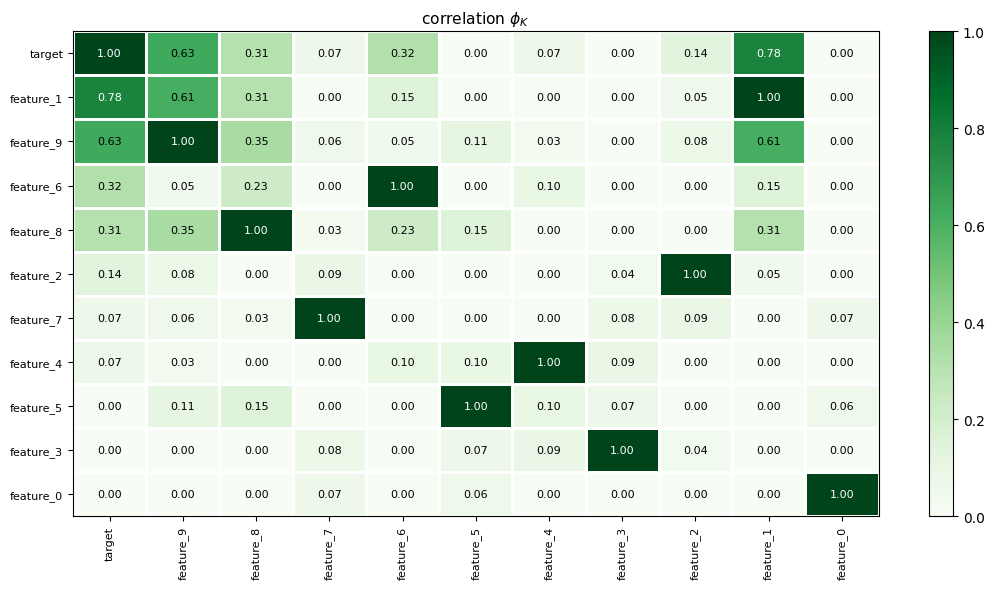

In [9]:
phik_overview = df.phik_matrix().round(2).sort_values('target')

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

In [12]:
df.nunique()

feature_0      11
feature_1    1568
feature_2    1870
feature_3      63
feature_4     448
feature_5    1870
feature_6      23
feature_7      40
feature_8      87
feature_9     932
target          9
dtype: int64

In [34]:
#5, 3, 0
df.drop(['feature_5', 'feature_3', 'feature_0'], axis=1, inplace=True)

In [35]:
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
from sklearn.model_selection import train_test_split

In [36]:
df.isnull().sum()

feature_1    0
feature_2    0
feature_4    0
feature_6    0
feature_7    0
feature_8    0
feature_9    0
target       0
dtype: int64

In [37]:
drop_cols = ['target']

X = df.drop('target', axis=1)
y = df['target']

In [38]:
X

,feature_1,feature_2,feature_4,feature_6,feature_7,feature_8,feature_9
0,163.000000,-1.450726,332,170,-9,0.10,50.339080
1,108.451384,2.233679,425,173,16,0.10,44.367816
2,167.738026,-8.024895,50,171,-9,0.10,44.902299
3,167.000000,-0.201363,224,173,-2,0.52,44.770115
4,183.000000,14.666233,351,170,13,0.10,45.241379
...,...,...,...,...,...,...,...
1865,114.849701,-8.475321,339,170,9,0.10,44.419540
1866,152.198802,10.065974,241,174,-1,0.10,43.488506
1867,118.000000,9.569632,450,171,-3,0.10,44.477011
1868,188.521004,14.327537,392,174,1,0.00,48.706897


In [39]:
y

0       engine_ignition
1             break_bug
2          engine_check
3          engine_check
4           another_bug
             ...       
1865         gear_stick
1866       engine_check
1867        wheel_shake
1868        electro_bug
1869        electro_bug
Name: target, Length: 1870, dtype: object

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
model = CatBoostClassifier(random_state=42,
                           thread_count=-1)
model.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          verbose=100, plot=False, 
          early_stopping_rounds=100)

Learning rate set to 0.10885
0:	learn: 1.8756446	test: 1.8795531	best: 1.8795531 (0)	total: 9.4ms	remaining: 9.4s
100:	learn: 0.4914671	test: 0.6216026	best: 0.6216026 (100)	total: 233ms	remaining: 2.07s
200:	learn: 0.3758067	test: 0.6031558	best: 0.6003294 (182)	total: 436ms	remaining: 1.73s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6003293535
bestIteration = 182

Shrink model to first 183 iterations.


In [42]:
fi = model.get_feature_importance(prettified=True)
fi

,Feature Id,Importances
0,feature_1,35.659204
1,feature_9,30.746539
2,feature_8,14.993314
3,feature_6,5.349107
4,feature_2,4.845841
5,feature_7,4.367855
6,feature_4,4.038140


In [43]:
import numpy as np

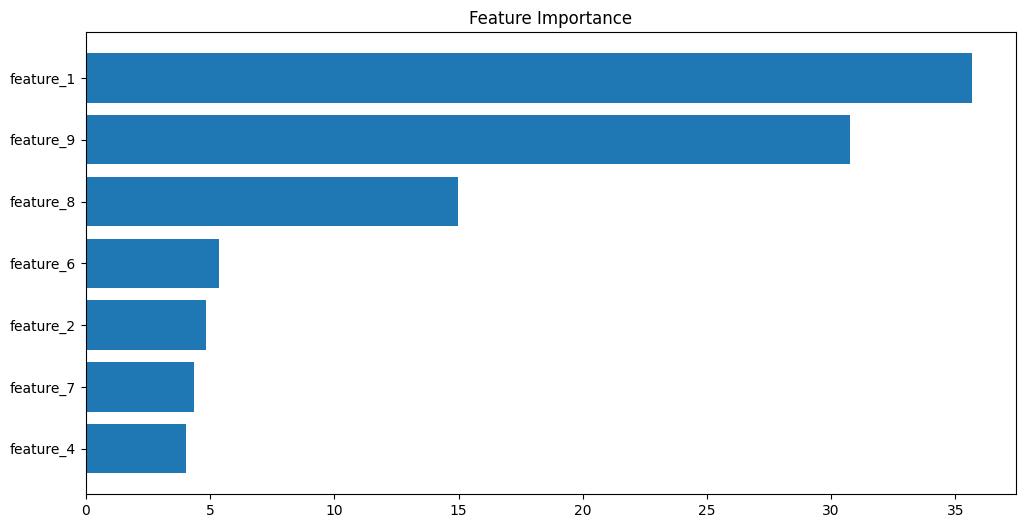

In [44]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance');

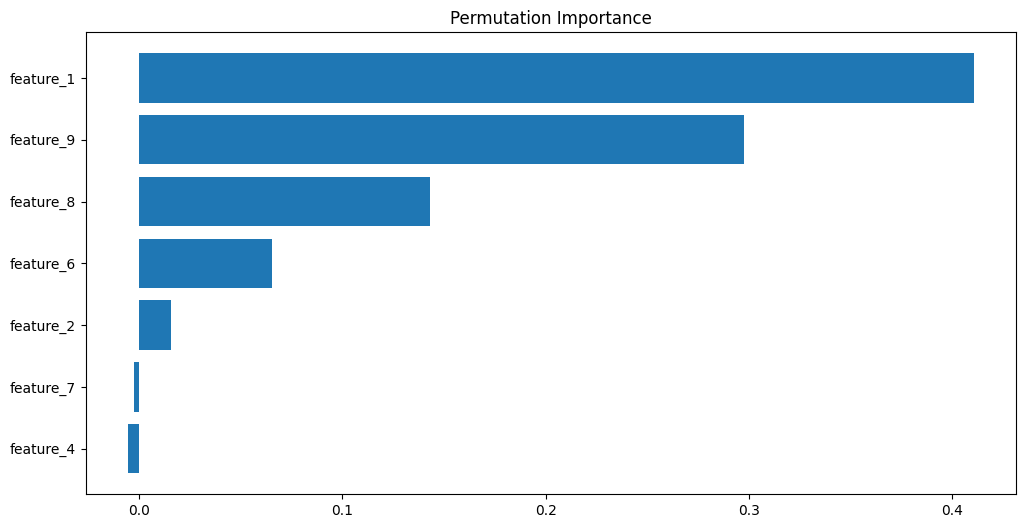

In [45]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Permutation Importance');

In [46]:
import shap

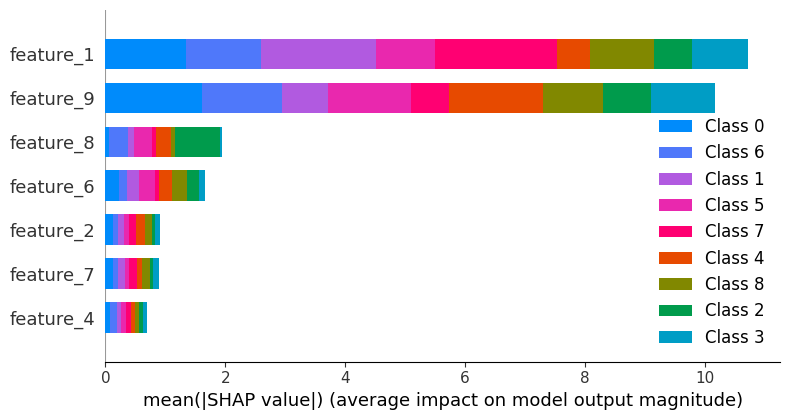

In [47]:
explainer = shap.TreeExplainer(model)

val_dataset = Pool(data=X_test, label=y_test)
shap_values = explainer.shap_values(val_dataset)
shap.summary_plot(shap_values, X_test, max_display = 25)

In [48]:
sorted_idx

array([2, 4, 1, 3, 5, 6, 0])